# Verkehrsaufkommen

### Stillstand im Verkehr vorhersagen

<p><strong>Szenario:</strong> Du arbeitest als Data Scientist für eine Taxi-App, die unter anderem in Ecuador tätig ist. Dort ist das Unternehmen vor allem in der Hauptstadt Quito vertreten. Um die Benutzerfreundlichkeit zu erhöhen, soll die Dauer, wie lange Passagiere voraussichtlich im Verkehr stecken werden, genauer modelliert werden. Dazu hat dein Unternehmen nachverfolgt, wie lange das Fahrzeug bei jeder Fahrt komplett stehen bleibt. Das ist die im Voraus zu berechnende Variable. </p>
<p>Wenn die Passagiere vorher wissen, wie lange sie im Verkehr stecken, können sie sich besser auf potentiell lange Fahrtdauern einstellen und erleben die Fahrt positiver. Da die Kosten vor allem nach Strecke und weniger nach Fahrtdauer berechnet werden, sind diese Fahrten außerdem nicht so lukrativ, wie Fahrten, die das Taxi vielleicht ansonsten durchführen könnte.</p>
<p>Folgende Hintergrundinformationen zu Quito könnten bei der Aufgabe hilfreich sein:</p>
<ul>
<li><a href="https://www.openstreetmap.org/#map=12/-0.2472/-78.5049" rel="noopener" target="_blank">Hier</a> kannst du dir einen Überblick über die Stadt verschaffen.</li>
<li>Da es besonders um den Verkehr innerhalb der Stadt und Randbezirke inkl. Flughafen geht, kannst du davon ausgehen, dass nur die Daten innerhalb der folgenden Koordinaten für die Vorhersage relevant sind:<ul>
<li>Maximaler und minimaler Breitengrad: <code>[-0.4,0.05]</code></li>
<li>Maximaler und minimaler Längengrad: <code>[-78.6,-78.3]</code></li>
</ul>
</li>
<li>In Ecuador herrscht von Oktober bis Mai die Regenzeit und von Juni bis September die Trockenzeit.</li>
<li>Die Geschwindigkeitsbegrenzung liegt in der Stadt bei 50 km/h und in Richtung Flughafen bei 70 km/h.</li>
</ul>


<p>Jede Zeile des Datensets entspricht einer Taxifahrt in Quito, Ecuador. Das Datenwörterbuch sieht wie folgt aus:</p>
<table>
<thead>
<tr>
<th>Spaltennummer</th>
<th align="center">Spaltenname</th>
<th align="center">Datenniveau</th>
<th align="right">Beschreibung</th>
</tr>
</thead>
<tbody><tr>
<td>0</td>
<td align="center"><code>'id'</code></td>
<td align="center">kategorisch  (<code>int</code>)</td>
<td align="right">Eine eindeutige Identifikationsnummer für jede Zeile</td>
</tr>
<tr>
<td>1</td>
<td align="center"><code>'vendor_id'</code></td>
<td align="center">kategorisch (<code>string</code>)</td>
<td align="right">Name des gebuchten Taxiunternehmens</td>
</tr>
<tr>
<td>2</td>
<td align="center"><code>'pickup_datetime'</code></td>
<td align="center">kontinuierlich (<code>datetime</code>)</td>
<td align="right">Datum und Uhrzeit des Fahrtbeginns</td>
</tr>
<tr>
<td>3</td>
<td align="center"><code>'pickup_longitude'</code></td>
<td align="center">kontinuierlich (<code>float</code>)</td>
<td align="right">Längengrad, bei dem die Fahrt begonnen hat</td>
</tr>
<tr>
<td>4</td>
<td align="center"><code>'pickup_latitude'</code></td>
<td align="center">kontinuierlich (<code>float</code>)</td>
<td align="right">Breitengrad, bei dem die Fahrt begonnen hat</td>
</tr>
<tr>
<td>5</td>
<td align="center"><code>'dropoff_longitude'</code></td>
<td align="center">kontinuierlich (<code>float</code>)</td>
<td align="right">Längengrad des Zielorts</td>
</tr>
<tr>
<td>6</td>
<td align="center"><code>'dropoff_latitude'</code></td>
<td align="center">kontinuierlich (<code>float</code>)</td>
<td align="right">Breitengrad des Zielorts</td>
</tr>
<tr>
<td>7</td>
<td align="center"><code>'store_and_fwd_flag'</code></td>
<td align="center">kategorisch</td>
<td align="right">Gibt an, ob Daten überlängere Zeit zwischengespeichert wurden (<code>Y</code>) oder direkt an den Server gingen (<code>N</code>)</td>
</tr>
<tr>
<td>8</td>
<td align="center"><code>'trip_estimated'</code></td>
<td align="center">kontinuierlich (<code>int</code>)</td>
<td align="right">Geschätze Fahrtdauer ohne Berücksichtigung des Verkehrs (Sekunden)</td>
</tr>
<tr>
<td>9</td>
<td align="center"><code>'distance_m'</code></td>
<td align="center">kontinuierlich(<code>float</code>)</td>
<td align="right">Distanz zwischen Abhol- und Ankunftsort</td>
</tr>
<tr>
<td>10</td>
<td align="center"><code>'wait_sec'</code></td>
<td align="center">kontinuierlich (<code>int</code>)</td>
<td align="right">Dauer, die Passagiere im Verkehr stecken geblieben sind (Sekunden). Dabei hat das Fahrzeug komplett gestanden.</td>
</tr>
</tbody></table>


## Preparation

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_train.csv")

## Exlporative Data Analysis

In [4]:
df.head()

,id,vendor_id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_estimated,distance_m,wait_sec
0,0,Quito,2016-08-25 12:40:00,-78.411326,-0.309814,-78.455283,-0.287551,N,678,7363.299869,38
1,1,Quito,2016-12-17 05:29:50,-78.512510,-0.221165,-78.478725,-0.196938,N,750,6450.734909,210
2,2,Quito,2017-03-16 05:36:36,-78.467560,-0.163823,-78.483523,-0.094844,N,1274,9445.014567,666
3,3,Quito,2016-10-20 09:25:57,-78.472038,-0.139989,-78.494747,-0.169194,N,615,5772.514970,312
4,4,Quito,2016-12-01 12:58:06,-78.493910,-0.176009,-78.504876,-0.180504,N,308,1719.218262,70


In [4]:
df.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_estimated          int64
distance_m            float64
wait_sec                int64
dtype: object

In [5]:
print('df length: ', len(df))
print('vendor_id unique: ', df.vendor_id.unique())
print('vendor_id unique counts: ', df.vendor_id.value_counts())
print('store_and_fwd_flag unique: ', df.store_and_fwd_flag.unique())
print('store_and_fwd_flag unique counts: ', df.store_and_fwd_flag.value_counts())

df length:  15657
vendor_id unique:  ['Quito' 'Quito Cabify Lite' 'Quito Cabify Executive']
vendor_id unique counts:  vendor_id
Quito                     15469
Quito Cabify Lite           159
Quito Cabify Executive       29
Name: count, dtype: int64
store_and_fwd_flag unique:  ['N']
store_and_fwd_flag unique counts:  store_and_fwd_flag
N    15657
Name: count, dtype: int64


In [6]:
print('index_size', df.index.size)
print('is NaN', df.isna().sum())
print('duplicated', df.duplicated().sum())

index_size 15657
is NaN id                    0
vendor_id             0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_estimated        0
distance_m            0
wait_sec              0
dtype: int64
duplicated 0


,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_estimated,distance_m,wait_sec
count,15657.000000,15657.000000,15657.000000,15657.000000,15657.000000,1.565700e+04,15657.000000,15657.000000
mean,7828.000000,-78.491040,-0.186257,-78.491826,-0.188772,1.073200e+03,5447.242889,304.477295
std,4519.930918,0.031523,0.063181,0.032192,0.064844,2.409360e+04,4777.745393,284.184446
min,0.000000,-79.907673,-2.109441,-79.891648,-2.156118,-1.844000e+03,8.003643,0.000000
25%,3914.000000,-78.505258,-0.213994,-78.504300,-0.216839,3.130000e+02,2442.095418,108.000000
50%,7828.000000,-78.488799,-0.180563,-78.489255,-0.184772,5.140000e+02,4128.478934,222.000000
75%,11742.000000,-78.474127,-0.145438,-78.477369,-0.148315,8.280000e+02,6886.890834,404.000000
max,15656.000000,-78.173105,0.342586,-78.132796,0.349317,1.980260e+06,92322.757779,1929.000000


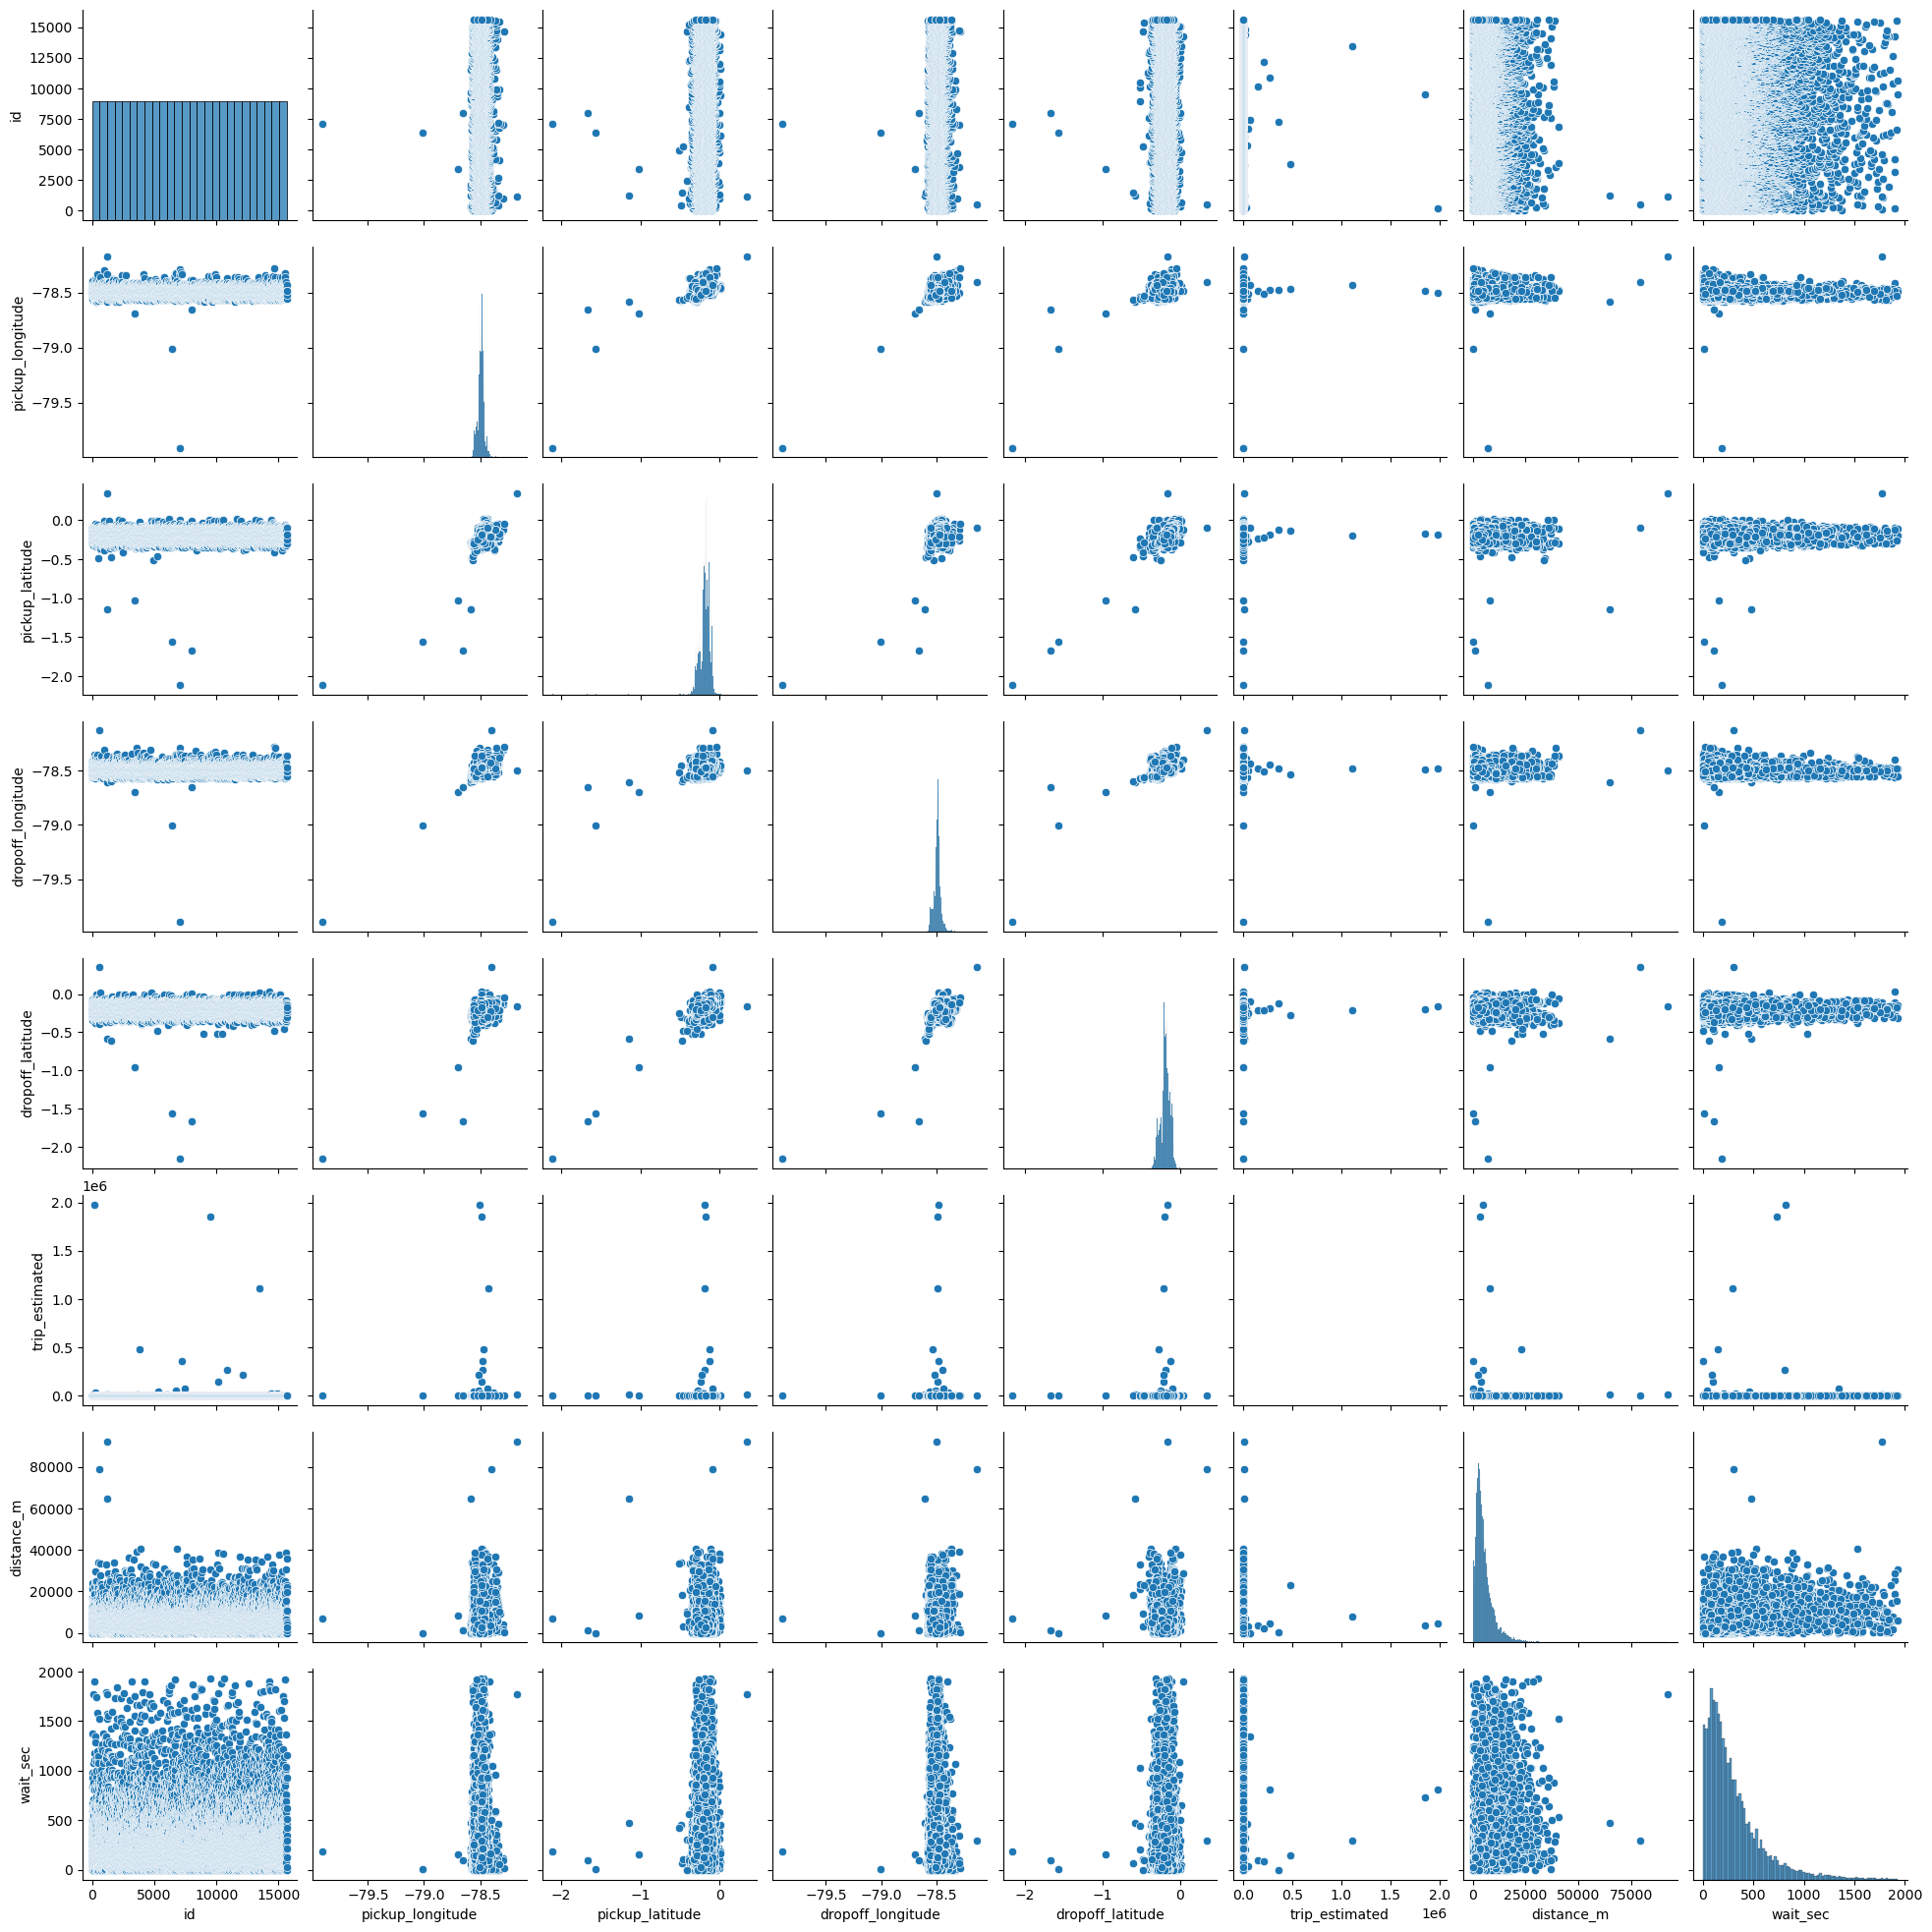

In [7]:
display(df.describe())
display(sns.pairplot(df))

(-0.4, 0.05)

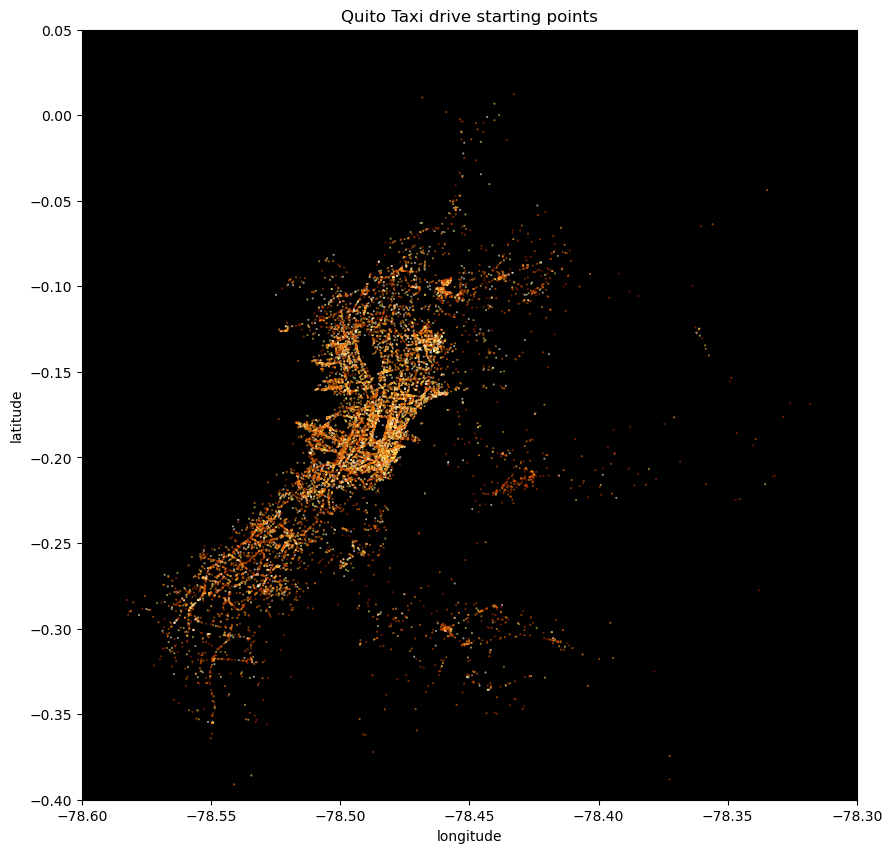

In [9]:
from statsmodels.robust import mad

plt.figure(figsize=(10, 10))
plt.title('Quito Taxi drive starting points')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.scatter(df.pickup_longitude, df.pickup_latitude, c=df.wait_sec, s=0.1, cmap='afmhot')
plt.gca().set_facecolor('black')

median = df.loc[:, 'wait_sec'].median()
mad_value = mad(df.loc[:, 'wait_sec'])
plt.clim(median - 3 * mad_value, median + 3 * mad_value)
plt.xlim([-78.6, -78.3])
plt.ylim([-0.4, 0.05])

### Outlier Detection

In [6]:
from sklearn.linear_model import RANSACRegressor

Text(0.5, 0, 'trip_estimated')

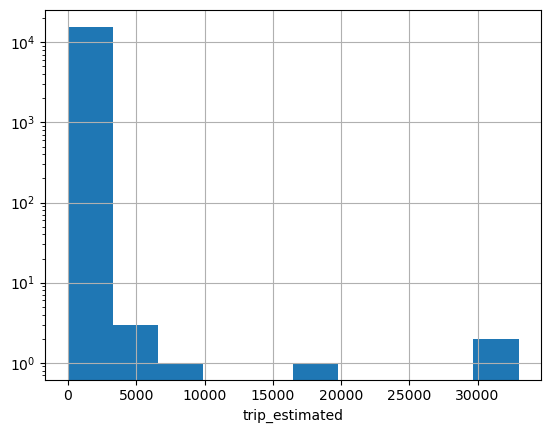

In [7]:
df['trip_estimated'] = df['trip_estimated'] / 60 
df.trip_estimated.hist()
plt.gca().set_yscale('log')
plt.xlabel('trip_estimated')

In [10]:
d_distance = mad(df.loc[:, 'distance_m']) * 3

model_outlier = RANSACRegressor(residual_threshold=d_distance, random_state=0)
model_outlier.fit(X=df.loc[:, ['trip_estimated']], y=df.loc[:, 'distance_m'])

(~model_outlier.inlier_mask_).sum()

119

(0.0, 10000.0)

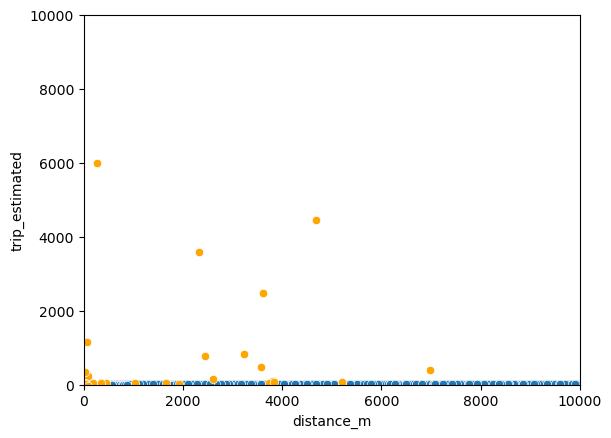

In [11]:
# visualize outliers with RANSAC
ax = sns.scatterplot(x=df.loc[model_outlier.inlier_mask_, 'distance_m'],
                     y=df.loc[model_outlier.inlier_mask_, 'trip_estimated'])

sns.scatterplot(x=df.loc[~model_outlier.inlier_mask_, 'distance_m'],
                y=df.loc[~model_outlier.inlier_mask_, 'trip_estimated'],
                color='orange', 
                ax=ax)

ax.set_ylim([0, 1e4])
ax.set_xlim([0, 1e4])

<Axes: >

<Axes: >

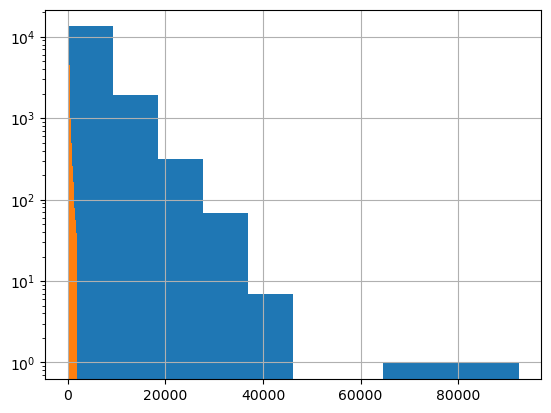

In [12]:
#histograms for outliers
display(df.distance_m.hist())
plt.gca().set_yscale('log')

display(df.wait_sec.hist())
plt.gca().set_yscale('log')

### Check correlations

In [13]:
df_temp = df.drop(columns=['vendor_id', 'pickup_datetime', 'store_and_fwd_flag'])
df_temp.head()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_estimated,distance_m,wait_sec
0,0,-78.411326,-0.309814,-78.455283,-0.287551,11.300000,7363.299869,38
1,1,-78.512510,-0.221165,-78.478725,-0.196938,12.500000,6450.734909,210
2,2,-78.467560,-0.163823,-78.483523,-0.094844,21.233333,9445.014567,666
3,3,-78.472038,-0.139989,-78.494747,-0.169194,10.250000,5772.514970,312
4,4,-78.493910,-0.176009,-78.504876,-0.180504,5.133333,1719.218262,70


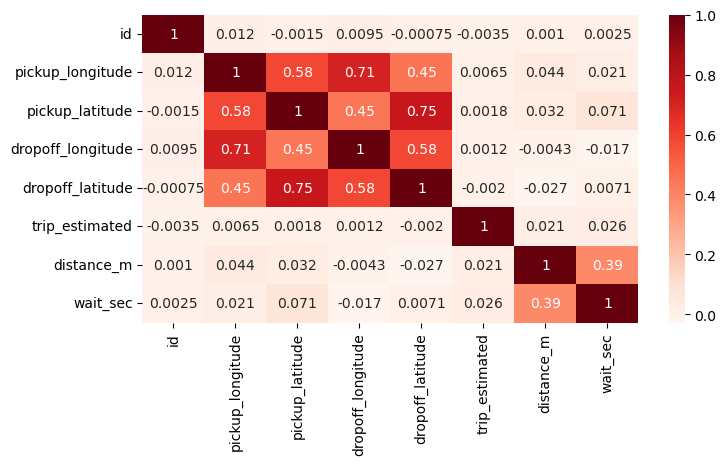

In [28]:
#check correlations using Pearson Correlation
plt.figure(figsize=(8, 4))
cor = df_temp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Train Test Split

In [14]:
df = pd.read_csv("data_train.csv")

In [16]:
from sklearn.model_selection import train_test_split

target = df.loc[:,'wait_sec']
features = df.drop('wait_sec', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

In [17]:
features_test.to_csv('features_test.csv', index=False)

## Data Preparation

In [18]:
df = features_train.copy()

In [20]:
# change datetime
df.loc[:, 'pickup_datetime'] = pd.to_datetime(df.loc[:, 'pickup_datetime'])

### Cleaning Data

In [21]:
def clean_data(df):
    df['pickup_datetime'] = pd.to_datetime(df.loc[:, 'pickup_datetime'])
    #no NaNs, so no more steps necessary

    return df

### Deal with Outliers

remove latitude and longitude out of range: [-0.4, 0.05][-78.6, -78.3]

In [22]:
df = df[(df['pickup_longitude'] >= -78.6) & (df['pickup_longitude'] <= -78.3)]
df = df[(df['dropoff_longitude'] >= -78.6) & (df['dropoff_longitude'] <= -78.3)]
df = df[(df['pickup_latitude'] >= -0.4) & (df['pickup_latitude'] <= 0.05)]
df = df[(df['dropoff_latitude'] >= -0.4) & (df['dropoff_latitude'] <= 0.05)]

removing outliers in trip_estimated with RANSAC

In [23]:
d_dist = mad(df.loc[:, 'distance_m']) * 3

model_outlier = RANSACRegressor(residual_threshold=d_dist, random_state=0)
model_outlier.fit(X=df.loc[:, ['trip_estimated']],
                  y=df.loc[:,'distance_m'])

df = df.loc[model_outlier.inlier_mask_, :]

combined data function

In [24]:
def sampling_data(features, target):
    #creating mask
    mask = np.ones(len(features), np.bool)
    #remove latitude and longitude out of range: 
    #[-0.4,0.05][-78.6,-78.3]
    mask[(features['pickup_longitude'] <= -78.6) | (features['pickup_longitude'] >= -78.3)] = False
    mask[(features['dropoff_longitude'] <= -78.6) | (features['dropoff_longitude'] >= -78.3)] = False
    mask[(features['pickup_latitude'] <= -0.4) | (features['pickup_latitude'] >= 0.05)] = False
    mask[(features['dropoff_latitude'] <= -0.4) | (features['dropoff_latitude'] >= 0.05)] = False

    #removing outliers in trip_estimated with ransac
    #first the median absolute deviation
    d_dist = mad(features.loc[:, 'distance_m']) * 3

    model_outlier = RANSACRegressor(residual_threshold=d_dist, random_state=0)
    model_outlier.fit(X=features.loc[:, ['trip_estimated']], 
                      y=features.loc[:, 'distance_m'])

    mask[~model_outlier.inlier_mask_] = False
    
    #applying mask to df
    features = features[mask]
    target = target[features.index]
    
    return features, target

## Modeling

simple Baselinemodel

In [26]:
feature_cols = ["trip_estimated", "distance_m"]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#select features
features_train_copy = features_train.loc[:, feature_cols]
features_test_copy = features_test.loc[:, feature_cols]

linreg2 = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("linear_regression", LinearRegression(n_jobs=-1))
])

linreg2.fit(features_train_copy, target_train)

#predict
linreg2_predictions = linreg2.predict(features_test_copy)

#evaluate
print("simple linear regression\n-------------")
print("R2 :", r2_score(target_test, linreg2_predictions))
print("MAE :", mean_absolute_error(target_test, linreg2_predictions))

simple linear regression
-------------
R2 : 0.18591654367270982
MAE : 180.98526196098203


### Feature Engineering

transform vendor_id to binary, call the column 'Quito'

In [28]:
vendor = (df.vendor_id == 'Quito').astype(int)
vendor = vendor.astype(float)
df['Quito'] = vendor
df = df.drop(['vendor_id'], axis=1)

create new feature speed

In [29]:
df['speed'] = (df.distance_m / 1000) / (df.trip_estimated / 3600)

histogram of speed

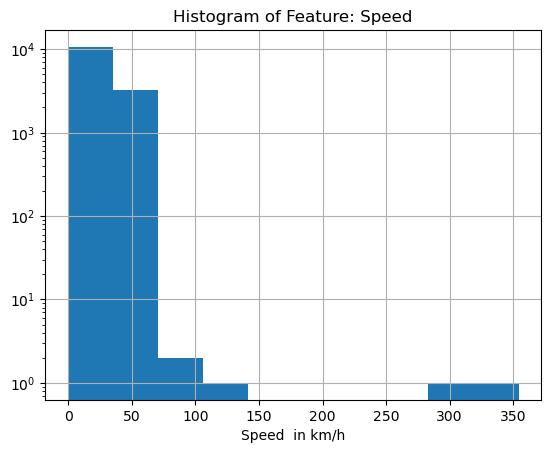

In [30]:
df.speed.hist()
plt.title('Histogram of Feature: Speed')
plt.xlabel('Speed  in km/h')
plt.gca().set_yscale('log')

In [33]:
# define plausible speed range
# more outliers
min_speed = 4  # walking speed
max_speed = 80 # max allowed speed is 70

df = df[(df['speed']>=min_speed) & (df['speed']<=max_speed)]

features_train = features_train.loc[df.index,:]
target_train = target_train.loc[df.index]

plot speed against wait_sec

Text(0, 0.5, 'wait_sec in sec')

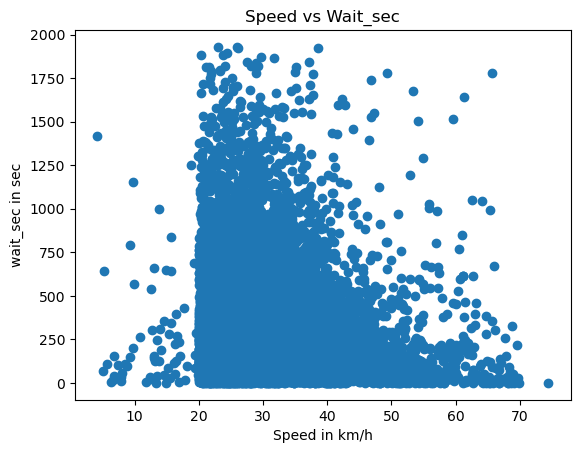

In [34]:
plt.scatter(x=df.loc[:,'speed'],
            y=target_train)
plt.title('Speed vs Wait_sec')
plt.xlabel('Speed in km/h')
plt.ylabel('wait_sec in sec')

In [37]:
# weekend
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['weekend'] = (df['pickup_datetime'].dt.weekday > 5).astype(int)  

In [38]:
#    Dry Season : Jun - Sep
#    Wet Season : Oct - May

def get_season(month):
    #0 for wet season 
    #1 for dry season

    if 9>= month >=6:
        return 0
    return 1   

df['season'] = df['pickup_datetime'].dt.month.apply(get_season)

In [41]:
from math import radians, cos, sin, asin, sqrt

# calculating haversine distance

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)

    lon1 (float) : longitude from start location
    lat1 (float) : latitude from start location
    lon2 (float) : longitude from end location
    lat2 (float) : longitude from end location
    
    Returns distance between two points on earth
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [42]:
#distance to center using haversine formula
quito_center = (-0.175, -78.5) #longitude, latitude

df["pickup_distance_to_center"] = (df[['pickup_latitude', 'pickup_longitude']].
                                   apply(lambda x: haversine(x[1], 
                                                             x[0], 
                                                             quito_center[1], 
                                                             quito_center[0]), 
                                         axis=1))

df["dropoff_distance_to_center"] = (df[['dropoff_latitude','dropoff_longitude']]
                                      .apply(lambda x: haversine(x[1], 
                                                                 x[0], 
                                                                 quito_center[1], 
                                                                 quito_center[0]),
                                             axis=1))

C:\Users\Dabbel\AppData\Local\Temp\ipykernel_7308\835996085.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  apply(lambda x: haversine(x[1],
C:\Users\Dabbel\AppData\Local\Temp\ipykernel_7308\835996085.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[0],
C:\Users\Dabbel\AppData\Local\Temp\ipykernel_7308\835996085.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .apply(lambda x: haversine(x[1],
C:\Users\Dabbel\AppData\Loca

Text(0.5, 0, 'distance_to_center in km')

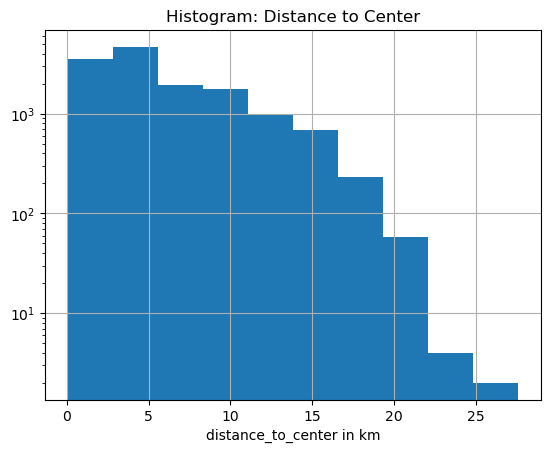

In [43]:
# show histogram of distance to center
df.pickup_distance_to_center.hist()
plt.gca().set_yscale('log')
plt.title('Histogram: Distance to Center')
plt.xlabel('distance_to_center in km')

In [44]:
#going downtown or uptown
df["to_center"] = (df["pickup_distance_to_center"] > df["dropoff_distance_to_center"])

### engineer features